# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

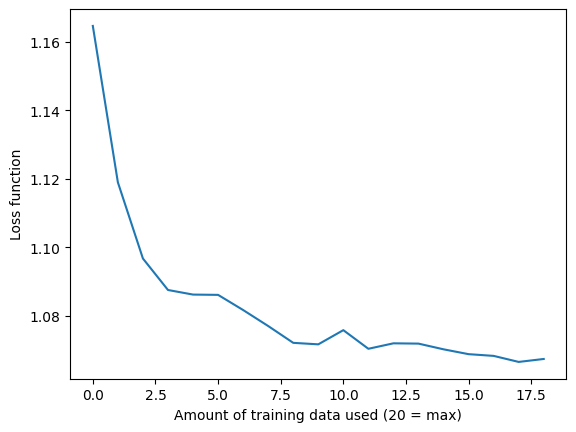

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [27]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

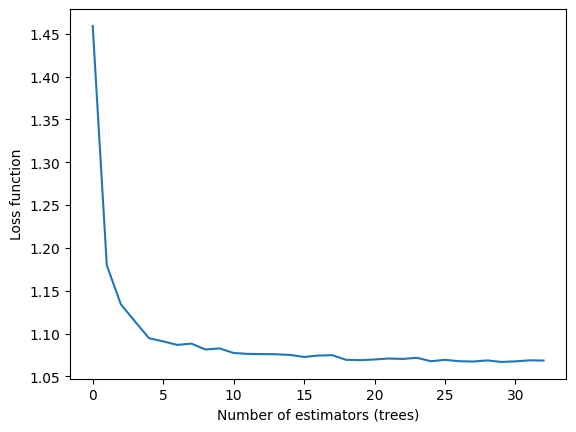

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [13]:
import pandas as pd

# Load games data
games = pd.read_csv("Games.csv")

# Peek at the data
games.head()


/tmp/ipykernel_5769/3804970615.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv("Games.csv")


,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,gameLabel,gameSubLabel,seriesGameNumber
0,22401143,2025-04-06 20:30:00,Golden State,Warriors,1610612744,Houston,Rockets,1610612745,96,106,1610612745,Regular Season,18064.0,1000011,NaN,NaN,0.0
1,22401142,2025-04-06 20:00:00,Denver,Nuggets,1610612743,Indiana,Pacers,1610612754,120,125,1610612754,Regular Season,19932.0,1000046,NaN,NaN,0.0
2,22401140,2025-04-06 19:00:00,New York,Knicks,1610612752,Phoenix,Suns,1610612756,112,98,1610612752,Regular Season,19812.0,30,NaN,NaN,0.0
3,22401136,2025-04-06 18:00:00,Atlanta,Hawks,1610612737,Utah,Jazz,1610612762,147,134,1610612737,Regular Season,16331.0,650,NaN,NaN,0.0
4,22401137,2025-04-06 18:00:00,Boston,Celtics,1610612738,Washington,Wizards,1610612764,124,90,1610612738,Regular Season,19156.0,17,NaN,NaN,0.0


In [16]:
games.columns.tolist()

['gameId',
 'gameDate',
 'hometeamCity',
 'hometeamName',
 'hometeamId',
 'awayteamCity',
 'awayteamName',
 'awayteamId',
 'homeScore',
 'awayScore',
 'winner',
 'gameType',
 'attendance',
 'arenaId',
 'gameLabel',
 'gameSubLabel',
 'seriesGameNumber']

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best number of estimators: {'n_estimators': 50}
Best Accuracy: 0.5775391201745904


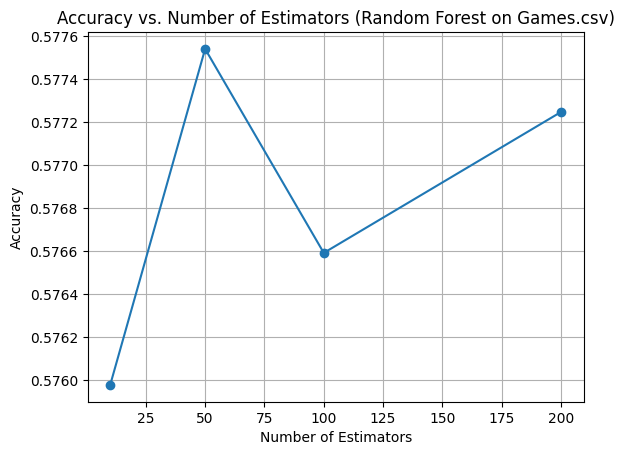

In [24]:
games["homeWin"] = (games["homeScore"] > games["awayScore"]).astype(int)

features = ["hometeamCity", "hometeamName", "awayteamCity", "awayteamName", "gameType"]

# Drop rows with missing data
games = games.dropna(subset=features + ["homeWin"])

# Encode categorical features
games_encoded = pd.get_dummies(games[features], drop_first=True)

# Define X and y
X = games_encoded
y = games["homeWin"]

# Set up Random Forest + GridSearch
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [10, 50, 100, 200],
}

scorer = make_scorer(accuracy_score)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X, y)

# Print best result
print("Best number of estimators:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Plot accuracy vs. n_estimators
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], results["mean_test_score"], marker='o')
plt.title("Accuracy vs. Number of Estimators (Random Forest on Games.csv)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

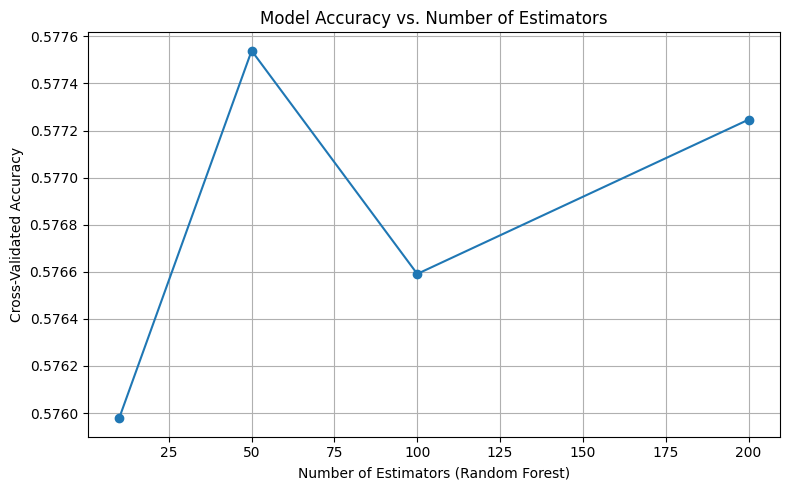

In [26]:
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(8, 5))
plt.plot(results["param_n_estimators"], results["mean_test_score"], marker='o', linestyle='-')
plt.title("Model Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators (Random Forest)")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


Text(120, 0.5575391201745904, 'Accuracy starts to level off here')

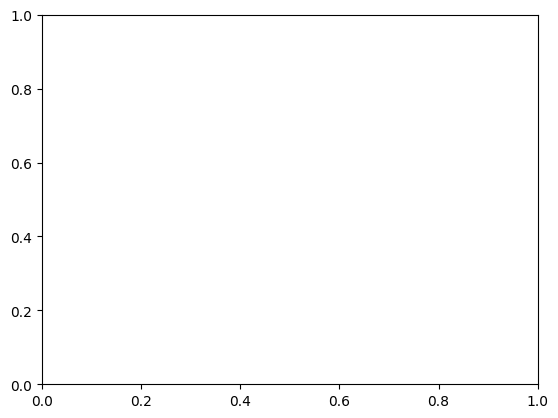

In [28]:
plt.annotate("Accuracy starts to level off here",
             xy=(100, results.loc[results["param_n_estimators"] == 100, "mean_test_score"].values[0]),
             xytext=(120, results["mean_test_score"].max() - 0.02),
             arrowprops=dict(arrowstyle="->"))

This plot shows the relationship between the number of estimators in a Random Forest and the model’s accuracy in predicting whether the home team wins. Accuracy improves initially but begins to level off after around 100 trees. This pattern suggests diminishing returns — adding more estimators increases training time without significantly improving performance. The story this plot tells is that 100 trees is a strong balance between speed and accuracy for this sports prediction problem.